# Librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import metrics


## Carga Base de datos

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#data.isnull().sum()
data.describe().round()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,...,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,15000.0,167484.0,2.0,2.0,2.0,35.0,-0.0,-0.0,-0.0,-0.0,...,43263.0,40311.0,38872.0,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0,0.0
std,8660.0,129748.0,0.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,...,64333.0,60797.0,59554.0,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0,0.0
min,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,...,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7501.0,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,...,2327.0,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.0,118.0,0.0
50%,15000.0,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,19052.0,18104.0,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,22500.0,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,...,54506.0,50190.0,49198.0,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0,0.0
max,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,...,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


# Variables:
- ID: identificacodor del cliente.
- LIMIT_BAL: monto de crédito otorgado en dolares.
1
- SEX: genero (1=male, 2=female)
- EDUCATION: educación (1=graduate school, 2=university, 3=high school,
4=others, 5=unknown, 6=unknown)
- MARRIAGE: estado civi (1=married, 2=single, 3=others)
- AGE: edad en años
- PAY_0: estado de pago a septiembre 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight months,
9=payment delay for nine months and above)
- PAY_2: estado de pago a agosto 2005
- PAY_3: estado de pago a julio 2005
- PAY_4: estado de pago a junio 2005
- PAY_5: estado de pago a mayo 2005
- PAY_6: estado de pago a abril 2005
- BILL_AMT1: monto del estado de cuenta a septiembre 2005 en dólares
- BILL_AMT2: monto del estado de cuenta a agosto 2005 en dólares
- BILL_AMT3: monto del estado de cuenta a julio 2005 en dólares
- BILL_AMT4: monto del estado de cuenta a junio 2005 en dólares
- BILL_AMT5: monto del estado de cuenta a mayo 2005 en dólares
- BILL_AMT6: monto del estado de cuenta a abril 2005 en dólares
- PAY_AMT1: importe del pago anterior en septiembre 2005 en dólares
- PAY_AMT2: importe del pago anterior en agosto 2005 en dólares
- PAY_AMT3: importe del pago anterior en julio 2005 en dólares
- PAY_AMT4: importe del pago anterior en junio 2005 en dólares
- PAY_AMT5: importe del pago anterior en mayo 2005 en dólares
- PAY_AMT6: importe del pago anterior en abril 2005 en dólares
- default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [26]:
data.isnull()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
data = data.set_index('ID')

In [6]:
# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
# 1=married, 2=single, 3=others

data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

* Reemplazo de variables EDUCATION y MARRIAGE para agrupar los valores repetidos con otro valor 

In [8]:
data['EDUCATION']=data['EDUCATION'].replace([0, 6], 5)
data['MARRIAGE']=data['MARRIAGE'].replace([0], 3)

In [9]:
#Variable respuesta

data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

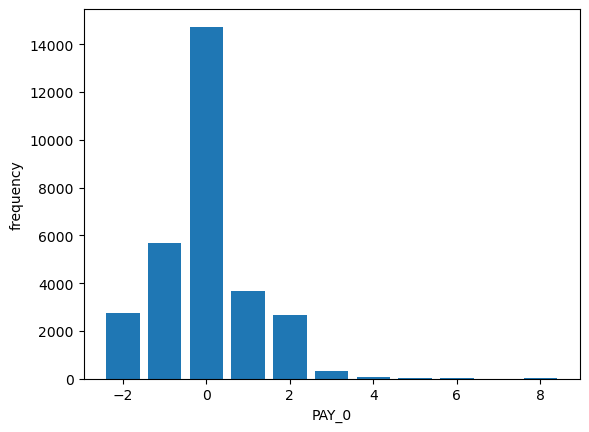

In [10]:
data_dist = data['PAY_0'].value_counts()
plt.bar(data_dist.index, data_dist)
plt.xlabel('PAY_0')
plt.ylabel('frequency')
plt.show()

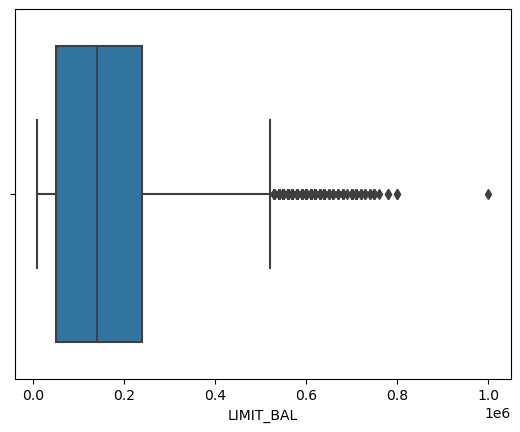

In [11]:
# Boxplot for 'duration'
g = sns.boxplot(x=data["LIMIT_BAL"])

In [12]:
corr = data.corr()
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.000000,0.024755,-0.219365,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.013691,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219365,0.013691,1.000000,-0.131816,0.175499,0.105193,0.120662,0.113370,0.108355,0.096613,...,-0.002208,-0.009384,-0.010872,-0.038229,-0.029372,-0.039936,-0.038786,-0.042082,-0.039017,0.026969
MARRIAGE,-0.111012,-0.028522,-0.131816,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,0.034377,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.144713,-0.090874,0.175499,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105193,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.120662,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.113370,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108355,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.096613,0.034377,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

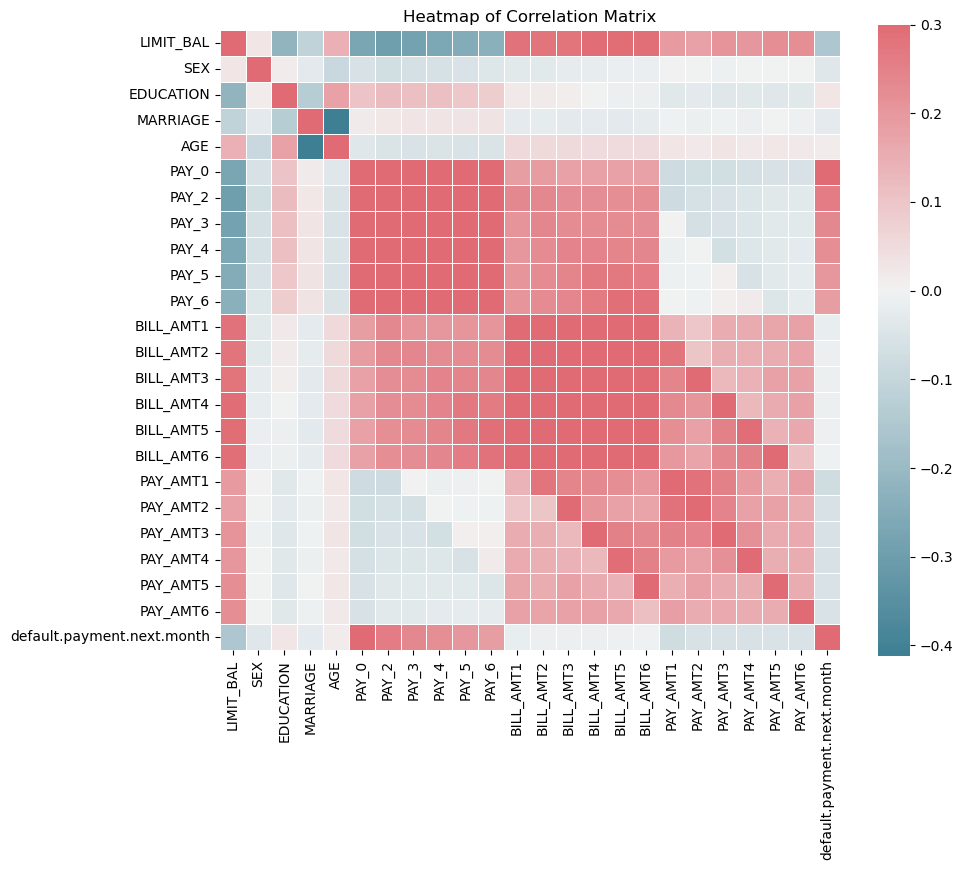

In [13]:
# Heatmap

plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [14]:

x=data.drop('default.payment.next.month', 1)
y=data['default.payment.next.month']


C:\Users\mpazr\AppData\Local\Temp\ipykernel_2076\2273284527.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=data.drop('default.payment.next.month', 1)


In [15]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


# Normalización

In [16]:
ss=StandardScaler()
ss.fit(x)
data2=ss.transform(x)
data2

array([[-1.13672015,  0.81016074,  0.18643218, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18643218, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18643218, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18643218, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.46132739, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18643218, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [17]:
y

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default.payment.next.month, Length: 30000, dtype: int64

### Separación data de entrenamiento y testeo

In [18]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.25,random_state=0)

print("Ejemplos usados para entrenar: ", len(x_train))
print("Ejemplos usados para test: ", len(x_test))

Ejemplos usados para entrenar:  22500
Ejemplos usados para test:  7500


### Modelo Regresión logistica

In [19]:
# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression()
modelo.fit(x_train, y_train)

C:\Users\mpazr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_) # b0
print("Coeficiente:", list(zip(x.columns, modelo.coef_.flatten(), ))) # b1
print("Accuracy de entrenamiento:", modelo.score(x, y)) # Cuanto datos clasifico correctamente

Intercept: [-1.69024563e-06]
Coeficiente: [('LIMIT_BAL', -5.011318610785322e-06), ('SEX', -2.97809520456487e-06), ('EDUCATION', -3.6344576286948374e-06), ('MARRIAGE', -3.1536063823004157e-06), ('AGE', -5.17559826323892e-05), ('PAY_0', 3.7658817135380013e-06), ('PAY_2', 3.0281332185519503e-06), ('PAY_3', 2.7076247614539432e-06), ('PAY_4', 2.48881794116781e-06), ('PAY_5', 2.3717104817932276e-06), ('PAY_6', 2.2684428441603782e-06), ('BILL_AMT1', -1.3863094092773177e-05), ('BILL_AMT2', 6.353186028964706e-06), ('BILL_AMT3', 3.2050178886447864e-06), ('BILL_AMT4', 3.663822764862592e-06), ('BILL_AMT5', 3.680337936912977e-06), ('BILL_AMT6', 1.4844737602591195e-06), ('PAY_AMT1', -4.5582265095983304e-05), ('PAY_AMT2', -2.8622201752364406e-05), ('PAY_AMT3', -1.749384387124543e-05), ('PAY_AMT4', -1.0328417944154457e-05), ('PAY_AMT5', -5.20314631813907e-06), ('PAY_AMT6', -1.9464913278952714e-06)]
Accuracy de entrenamiento: 0.7787333333333334


In [21]:

predicciones = modelo.predict(X = x_test,)

print("Matriz de confusión")
print("-------------------")
Matriz_confusion=confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
print(Matriz_confusion)

Matriz de confusión
-------------------
[[5868    0]
 [1632    0]]


In [22]:
accuracy = modelo.score(x, y)
print(f"El accuracy o precisión global de test es: {100 * accuracy} %")

El accuracy o precisión global de test es: 77.87333333333333 %


### Arboles de decisión

In [23]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(x_train, y_train)
dt2_score_train = dt2.score(x_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(x_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.8171555555555555
Testing score:  0.8269333333333333


In [24]:
# Make predictions on the test set
preds = dt2.predict(x_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(y_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(x_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(y_test, probs)))


Accuracy score: 
0.8269333333333333

Area Under Curve: 
0.6931009580041969


In [25]:

predicciones = modelo.predict(X = x_test,)

print("Matriz de confusión")
print("-------------------")
Matriz_confusion=confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
print(Matriz_confusion)

Matriz de confusión
-------------------
[[5868    0]
 [1632    0]]
